In [234]:
import pandas as pd
import numpy as np

In [235]:
# Generate dummy data
np.random.seed(42)
data = pd.DataFrame({"Heights": np.random.normal(loc=170, scale=10 , size = 100)})
data

,Heights
0,174.967142
1,168.617357
2,176.476885
3,185.230299
4,167.658466
...,...
95,155.364851
96,172.961203
97,172.610553
98,170.051135


# Summary Statistics using describe() Method

In [236]:
data.describe()

,Heights
count,100.000000
mean,168.961535
std,9.081684
min,143.802549
25%,163.990943
50%,168.730437
75%,174.059521
max,188.522782


In [237]:
Mean = data['Heights'].mean()
Mean

168.96153482605902

# Summary Statistics using Mannually

In [238]:
# find range 
Range = data['Heights'].max() - data['Heights'].min()
Range

44.72023288598683

In [239]:
Meadian = data['Heights'].median()
Meadian

168.73043708220285

In [240]:
Mode = data['Heights'].mode()[0]
Mode

143.80254895910255

In [241]:
Var = data['Heights'].var()
Var

82.47698936301602

In [242]:
Std = data['Heights'].std()
Std

9.081684280078008

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
# Outlier Detection using Z-scores
data['z_score'] = zscore(data['Heights'])
Outliers = data[data['z_score'].abs() > 3]
data

,Heights,z_score
0,174.967142,0.664619
1,168.617357,-0.038089
2,176.476885,0.831697
3,185.230299,1.800406
4,167.658466,-0.144206
...,...,...
95,155.364851,-1.504697
96,172.961203,0.442629
97,172.610553,0.403824
98,170.051135,0.120582


In [244]:
# Outlier Detection using IQR
Q1 = data['Heights'].quantile(0.25)
Q3 = data['Heights'].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - 1.5 * IQR
Upper_Bound = Q3 - 1.5 * IQR
Q1

163.99094329503546

In [245]:
Q3

174.05952052012063

In [246]:
outliers_iqr = data[(data["Heights"] < Lower_Bound) | (data["Heights"] > Upper_Bound)]
outliers_iqr

,Heights,z_score
0,174.967142,0.664619
1,168.617357,-0.038089
2,176.476885,0.831697
3,185.230299,1.800406
4,167.658466,-0.144206
...,...,...
94,166.078918,-0.319009
96,172.961203,0.442629
97,172.610553,0.403824
98,170.051135,0.120582


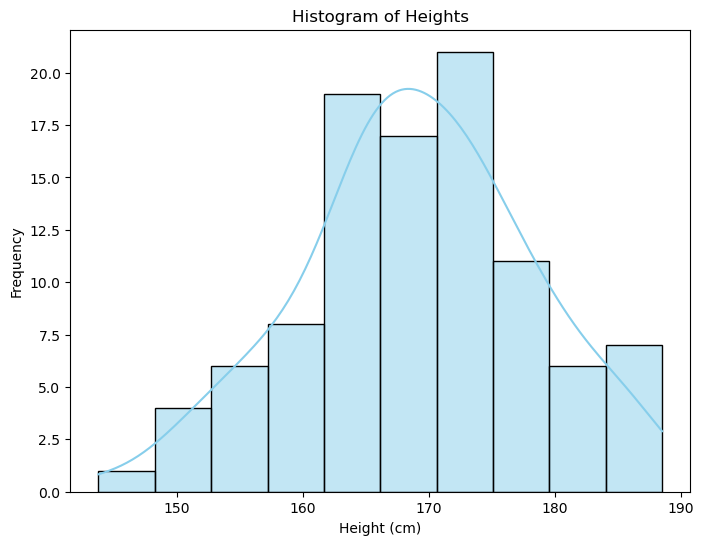

In [247]:
# Visualization - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data["Heights"], kde=True, bins=10, color='skyblue')
plt.title("Histogram of Heights")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.show()

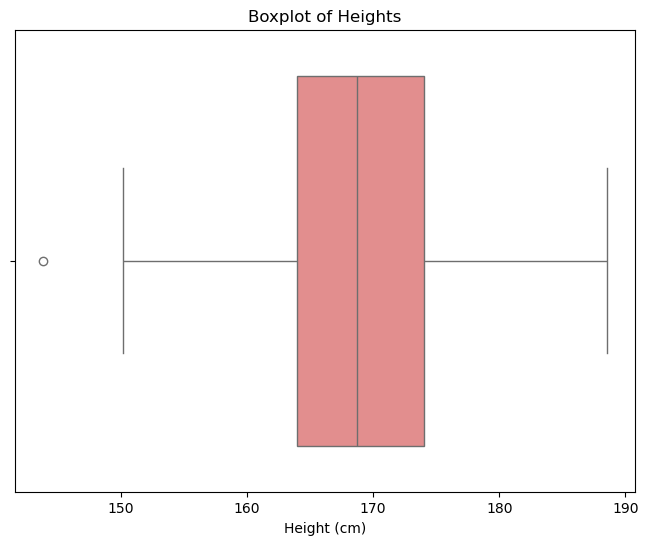

In [248]:
# Visualization - Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Heights"], color='lightcoral')
plt.title("Boxplot of Heights")
plt.xlabel("Height (cm)")
plt.show()

In [249]:
# Frequency Table (Binned Data)
frequency_table = pd.cut(data["Heights"], bins=5).value_counts()

pd.DataFrame(frequency_table)


,count
Heights,
"(161.691, 170.635]",36
"(170.635, 179.579]",32
"(152.747, 161.691]",14
"(179.579, 188.523]",13
"(143.758, 152.747]",5


In [250]:
# Create a DataFrame to store all the results
summary_data = {
    "Statistic": ["Mean", "Median", "Mode", "Range", "Variance", "Standard Deviation"],
    "Value": [Mean, Meadian, Mode, Range, Var, Std]
}

# Convert to DataFrame
summary_df = pd.DataFrame(summary_data)

# Convert Frequency Table to DataFrame
frequency_df = frequency_table.reset_index()
frequency_df.columns = ["Range (Bins)", "Frequency"]

# Outliers (Z-Score Method) as DataFrame
outliers_z_df = Outliers[["Heights", "z_score"]].reset_index(drop=True)

# Outliers (IQR Method) as DataFrame
outliers_iqr_df = outliers_iqr[["Heights"]].reset_index(drop=True)

summary_df

,Statistic,Value
0,Mean,168.961535
1,Median,168.730437
2,Mode,143.802549
3,Range,44.720233
4,Variance,82.476989
5,Standard Deviation,9.081684


In [251]:
frequency_df

,Range (Bins),Frequency
0,"(161.691, 170.635]",36
1,"(170.635, 179.579]",32
2,"(152.747, 161.691]",14
3,"(179.579, 188.523]",13
4,"(143.758, 152.747]",5


In [252]:
outliers_z_df

,Heights,z_score


In [253]:
outliers_iqr_df

,Heights
0,174.967142
1,168.617357
2,176.476885
3,185.230299
4,167.658466
...,...
81,166.078918
82,172.961203
83,172.610553
84,170.051135


In [254]:
# Vcome xo
Vcome = pd.read_excel(r"C:\Users\mk744\Downloads\Vcome Performance.xlsx")
Vcome.columns

Index(['Campaign', 'Unique Clicks', 'Clicks', 'Gross Clicks', 'Impressions',
       'Payout', 'payout in INR', 'Conversions', 'Earning Per Click (EPC)',
       'epc in INR', 'Click Through Rate (CTR)', 'Conversion Rate (CR)',
       'Sale Amount', 'saleAmount in INR', 'Extended Conversions',
       'Pending Sale Amount', 'pendingSaleAmount in INR',
       'Extended Sale Amount', 'extsa in INR', 'Extended Payout',
       'extPayout in INR', 'Rejected Conversions', 'Pending Conversions',
       'Pending Payout', 'pendingPayout in INR'],
      dtype='object')

In [255]:
Vcome_Cols = Vcome[['Campaign', 'Clicks']]
Vcome_Cols

,Campaign,Clicks
0,Tescomobile.com CPA - United Kingdom,6
1,Blibli.com CPS - Indonesia,0
2,Benetton.com CPS - India,0
3,LoveBeautyandPlanet.in CPS - India,0
4,Goibibo.com Trains CPS - India,21
5,Goibibo.com Flights CPS - India,0
6,"Eyewa.com CPS - BH, KW, MA, OM, QA, SA & AE",0
7,Airhelp.com CPS - Worldwide,10
8,Foreo.com CPS - Worldwide,9
9,Healthkart.com CPS - India,76


In [256]:
Partnerize = pd.read_csv(r"C:\Users\mk744\Downloads\Partnerize.csv")
Partnerize.columns

Index(['campaign_id', 'campaign_name', 'total_clicks', 'click_conversion_rate',
       'total_clicks_converted'],
      dtype='object')

In [257]:
Partnerize_Cols = Partnerize[['campaign_name', 'total_clicks']]
Partnerize_Cols

,campaign_name,total_clicks
0,Adobe,88606
1,StubHub NORAM,4918
2,Wise - Commission payout currency USD,3859
3,tripcom,2824
4,Klook (UK),2692
5,AirAsia Travel,801
6,EaseUS | Backup & Data Recovery,421
7,Etihad Holidays GCC,364
8,Corel Roxio & Pinnacle | Multimedia Software,221
9,WinZip and ReviverSoft | Utility Software,119


In [258]:
Cue_fs = pd.read_csv(r"C:\Users\mk744\Downloads\Cuelinks fs.csv")
Cue_fs.columns

Index(['Name', 'Campaign Type', 'Clicks', 'Transactions', 'Commission', 'CR',
       'EPC', 'Channel ID', 'Channel Name', 'Sale Amount'],
      dtype='object')

In [259]:
import warnings
warnings.filterwarnings('ignore')
Cue_fs_cols = Cue_fs[['Name', 'Clicks']]
Headers = ['Campaign_Name', 'Clicks']
Cue_fs_cols.columns = Headers
Cue_fs_cols['Inventory'] = 'Flipshope'
Cue_fs_cols['Partner'] = 'Cuelinks'
Cue_fs_cols

,Campaign_Name,Clicks,Inventory,Partner
0,Myntra,67192,Flipshope,Cuelinks
1,Ajio,29684,Flipshope,Cuelinks
2,Croma Retail,12569,Flipshope,Cuelinks
3,GoDaddy,9239,Flipshope,Cuelinks
4,Agoda,7279,Flipshope,Cuelinks
5,Myntra,6754,Flipshope,Cuelinks
6,Myntra,6075,Flipshope,Cuelinks
7,Snapdeal,4849,Flipshope,Cuelinks
8,ShopClues,4180,Flipshope,Cuelinks
9,Pepperfry,4079,Flipshope,Cuelinks


In [260]:
Cue_xo = pd.read_csv(r"C:\Users\mk744\Downloads\Cuelinks xo.csv")
Cue_xo.columns

Index(['Name', 'Campaign Type', 'Clicks', 'Transactions', 'Commission', 'CR',
       'EPC', 'Channel ID', 'Channel Name', 'Sale Amount'],
      dtype='object')

In [261]:
Cue_xo_cols = Cue_xo[['Name', 'Clicks']]

In [262]:
Cue_xo_cols.columns = Headers
Cue_xo_cols['Inventory'] = 'Xocoupon'
Cue_xo_cols['Partner'] = 'Cuelinks'
Cue_xo_cols

,Campaign_Name,Clicks,Inventory,Partner
0,Alibaba,6759,Xocoupon,Cuelinks
1,Croma Retail,2579,Xocoupon,Cuelinks
2,Apollo Pharmacy,2063,Xocoupon,Cuelinks
3,Ajio,1118,Xocoupon,Cuelinks
4,Mango UK,1024,Xocoupon,Cuelinks
5,Hewlett Packard (HP),890,Xocoupon,Cuelinks
6,Nykaa Beauty,611,Xocoupon,Cuelinks
7,Adda247,459,Xocoupon,Cuelinks
8,The Men's Wearhouse,324,Xocoupon,Cuelinks
9,Adidas ID,307,Xocoupon,Cuelinks


In [263]:
Cue_hz = pd.read_csv(r"C:\Users\mk744\Downloads\Cuelinks hz.csv")
Cue_hz.columns

Index(['Name', 'Campaign Type', 'Clicks', 'Transactions', 'Commission', 'CR',
       'EPC', 'Channel ID', 'Channel Name', 'Sale Amount'],
      dtype='object')

In [264]:
Cue_hz_cols = Cue_hz[['Name', 'Clicks']]
Cue_hz_cols.columns = Headers
Cue_hz_cols['Inventory'] = 'Hyyzo'
Cue_hz_cols['Partner'] = 'Cuelinks'
Cue_hz_cols

,Campaign_Name,Clicks,Inventory,Partner
0,Flipkart,39173,Hyyzo,Cuelinks
1,Myntra,5020,Hyyzo,Cuelinks
2,Ajio,2926,Hyyzo,Cuelinks
3,Boat,1525,Hyyzo,Cuelinks
4,Firstcry,792,Hyyzo,Cuelinks
5,Croma Retail,474,Hyyzo,Cuelinks
6,Mama Earth,373,Hyyzo,Cuelinks
7,Adidas,283,Hyyzo,Cuelinks
8,WOW,217,Hyyzo,Cuelinks
9,Snapdeal,118,Hyyzo,Cuelinks


In [265]:
Merge_Cuelinks = pd.concat([Cue_fs_cols, Cue_xo_cols, Cue_hz_cols], ignore_index=True)
Merge_Cuelinks.isna().sum()

Campaign_Name    0
Clicks           0
Inventory        0
Partner          0
dtype: int64

In [266]:
Merge_Cuelinks

,Campaign_Name,Clicks,Inventory,Partner
0,Myntra,67192,Flipshope,Cuelinks
1,Ajio,29684,Flipshope,Cuelinks
2,Croma Retail,12569,Flipshope,Cuelinks
3,GoDaddy,9239,Flipshope,Cuelinks
4,Agoda,7279,Flipshope,Cuelinks
...,...,...,...,...
130,Amazon India,1,Hyyzo,Cuelinks
131,Fernsnpetals,1,Hyyzo,Cuelinks
132,Flipkart,1,Hyyzo,Cuelinks
133,Nykaa Beauty,1,Hyyzo,Cuelinks


In [267]:
Vcome_Cols.columns = Headers
Vcome_Cols['Inventory'] = 'Xocoupon'
Vcome_Cols['Partner'] = 'Vcome'
Vcome_Cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Tescomobile.com CPA - United Kingdom,6,Xocoupon,Vcome
1,Blibli.com CPS - Indonesia,0,Xocoupon,Vcome
2,Benetton.com CPS - India,0,Xocoupon,Vcome
3,LoveBeautyandPlanet.in CPS - India,0,Xocoupon,Vcome
4,Goibibo.com Trains CPS - India,21,Xocoupon,Vcome


In [268]:
Partnerize_Cols.columns = Headers
Partnerize_Cols['Inventory'] = 'Xocoupon'
Partnerize_Cols['Partner'] = 'Partnerize'
Partnerize_Cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Adobe,88606,Xocoupon,Partnerize
1,StubHub NORAM,4918,Xocoupon,Partnerize
2,Wise - Commission payout currency USD,3859,Xocoupon,Partnerize
3,tripcom,2824,Xocoupon,Partnerize
4,Klook (UK),2692,Xocoupon,Partnerize


In [269]:
Merge = pd.concat([Merge_Cuelinks, Vcome_Cols, Partnerize_Cols], ignore_index=True)
Merge.isna().sum()

Campaign_Name    0
Clicks           0
Inventory        0
Partner          0
dtype: int64

In [270]:
Merge.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Myntra,67192,Flipshope,Cuelinks
1,Ajio,29684,Flipshope,Cuelinks
2,Croma Retail,12569,Flipshope,Cuelinks
3,GoDaddy,9239,Flipshope,Cuelinks
4,Agoda,7279,Flipshope,Cuelinks


In [271]:
Merge.shape

(193, 4)

In [272]:
# Admitad xo
Adm_xo = pd.read_excel(r"C:\Users\mk744\Downloads\Admitad xo .xlsx")
Adm_xo.columns

Index(['Adv. Campaign', 'Views', 'CTR', 'eCPM', 'Clicks', 'eCPC', 'CR',
       'Leads Sum', 'Sales Sum', 'Payment Sum Open', 'Payment Sum Approved',
       'Payment Sum Declined'],
      dtype='object')

In [273]:
Adm_xo_cols = Adm_xo[['Adv. Campaign', 'Clicks']]
Adm_xo_cols.columns = Headers
Adm_xo_cols['Inventory'] = 'Xocoupon'
Adm_xo_cols['Partner'] = 'Admitad'
Adm_xo_cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Udemy WW,36215,Xocoupon,Admitad
1,Lenovo Many GEOs,39983,Xocoupon,Admitad
2,Pdffiller Many Geos,408,Xocoupon,Admitad
3,Cleartrip [CPS] IN,1266,Xocoupon,Admitad
4,Norton [CPS] WW,1417,Xocoupon,Admitad


In [274]:
Adm_fs = pd.read_excel(r"C:\Users\mk744\Downloads\Admitad fs.xlsx")
Adm_fs_cols = Adm_fs[['Adv. Campaign', 'Clicks']]
Adm_fs_cols.columns = Headers
Adm_fs_cols['Inventory'] = 'Flipshope'
Adm_fs_cols['Partner'] = 'Admitad'
Adm_fs_cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Flipkart [CPS] IN,155156,Flipshope,Admitad
1,Udemy WW,459,Flipshope,Admitad
2,Fiverr Many GEO's,33,Flipshope,Admitad
3,Myntra [CPS] IN,12559,Flipshope,Admitad
4,Puma [CPS] IN,206,Flipshope,Admitad


In [275]:
Adm_hz = pd.read_excel(r"C:\Users\mk744\Downloads\Admitad hz.xlsx")
Adm_hz_cols = Adm_fs[['Adv. Campaign', 'Clicks']]
Adm_hz_cols.columns = Headers
Adm_hz_cols['Inventory'] = 'Hyyzo'
Adm_hz_cols['Partner'] = 'Admitad'
Adm_hz_cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Flipkart [CPS] IN,155156,Hyyzo,Admitad
1,Udemy WW,459,Hyyzo,Admitad
2,Fiverr Many GEO's,33,Hyyzo,Admitad
3,Myntra [CPS] IN,12559,Hyyzo,Admitad
4,Puma [CPS] IN,206,Hyyzo,Admitad


In [276]:
Merge1 = pd.concat([Merge, Adm_fs_cols, Adm_xo_cols, Adm_hz_cols], ignore_index=True)
Merge1.isna().sum()

Campaign_Name    0
Clicks           0
Inventory        0
Partner          0
dtype: int64

In [277]:
Merge1.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Myntra,67192,Flipshope,Cuelinks
1,Ajio,29684,Flipshope,Cuelinks
2,Croma Retail,12569,Flipshope,Cuelinks
3,GoDaddy,9239,Flipshope,Cuelinks
4,Agoda,7279,Flipshope,Cuelinks


In [305]:
imp_agfs = pd.read_csv(r"C:\Users\mk744\Downloads\imp agfs.csv")
imp_agfs.columns

Index(['Program', 'Program Id', 'Clicks', 'Actions', 'Sale Amount',
       'Action Earnings', 'Total Earnings', 'EPA', 'EPC', 'Conversion Rate',
       'AOV'],
      dtype='object')

In [279]:
imp_agfs_cols = imp_agfs[['Program', 'Clicks']]
imp_agfs_cols.columns = Headers
imp_agfs_cols['Inventory'] = 'Flipshope'
imp_agfs_cols['Partner'] = 'Impact'
imp_agfs_cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,"Chegg, Inc.",599,Flipshope,Impact


In [280]:
imp_fs = pd.read_csv(r"C:\Users\mk744\Downloads\imp fs.csv")
imp_fs_cols = imp_fs[['Program', 'Clicks']]
imp_fs_cols.columns = Headers
imp_fs_cols['Inventory'] = 'Flipshope'
imp_fs_cols['Partner'] = 'Impact'
imp_fs_cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Skyscanner,8111,Flipshope,Impact
1,Uber Global Riders,763,Flipshope,Impact
2,Coursera B2C Affiliate Program,6541,Flipshope,Impact
3,ExpressVPN,730,Flipshope,Impact
4,DataCamp,1017,Flipshope,Impact


In [281]:
imp_xo = pd.read_csv(r"C:\Users\mk744\Downloads\imp xo.csv")
imp_xo_cols = imp_xo[['Program', 'Clicks']]
imp_xo_cols.columns = Headers
imp_xo_cols['Inventory'] = 'Xocoupon'
imp_xo_cols['Partner'] = 'Impact'
imp_xo_cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Walmart Affiliate Program,15156,Xocoupon,Impact
1,Shopify,18529,Xocoupon,Impact
2,InVideo,1054,Xocoupon,Impact
3,NordVPN,2177,Xocoupon,Impact
4,Namecheap,2035,Xocoupon,Impact


In [282]:
imp_hz = pd.read_csv(r"C:\Users\mk744\Downloads\imp hz.csv")
imp_hz_cols = imp_hz[['Program', 'Clicks']]
imp_hz_cols.columns = Headers
imp_hz_cols['Inventory'] = 'Hyyzo'
imp_hz_cols['Partner'] = 'Impact'
imp_hz_cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Upwork,280,Hyyzo,Impact
1,Hostinger,145,Hyyzo,Impact
2,Namecheap,37,Hyyzo,Impact
3,StubHub International,12,Hyyzo,Impact
4,Trafft,0,Hyyzo,Impact


In [283]:
Merge2 = pd.concat([Merge1, imp_agfs_cols, imp_hz_cols, imp_fs_cols, imp_xo_cols], ignore_index=True)
Merge2.isna().sum()

Campaign_Name    0
Clicks           0
Inventory        0
Partner          0
dtype: int64

In [284]:
Merge2.shape

(432, 4)

In [285]:
Pokket_fs = pd.read_csv(r"C:\Users\mk744\Downloads\pokket fs.csv")
Pokket_fs.columns

Index(['Offer', 'Offer ID', 'Hosts', 'Clicks', 'Impressions',
       'Conversions All', 'Conversions Approved', 'Conversions Pending',
       'Conversions:Hold', 'CR', 'EPC', 'Finances All', 'Finances Approved',
       'Finances Pending', 'Hold'],
      dtype='object')

In [286]:
Pokket_fs_cols = Pokket_fs[['Offer', 'Clicks']]
Pokket_fs_cols.columns = Headers
Pokket_fs_cols['Inventory'] = 'Flipshope'
Pokket_fs_cols['Partner'] = 'Pokket'
Pokket_fs_cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Vrbo - CPS,1883,Flipshope,Pokket


In [287]:
Pokket_xo = pd.read_csv(r"C:\Users\mk744\Downloads\Pokket xo.csv")
Pokket_xo.columns

Index(['Offer', 'Offer ID', 'Hosts', 'Clicks', 'Impressions',
       'Conversions All', 'Conversions Approved', 'Conversions Pending',
       'Conversions:Hold', 'CR', 'EPC', 'Finances All', 'Finances Approved',
       'Finances Pending', 'Hold'],
      dtype='object')

In [288]:

Pokket_xo_cols = Pokket_xo[['Offer', 'Clicks']]
Pokket_xo_cols.columns = Headers
Pokket_xo_cols['Inventory'] = 'Xocoupon'
Pokket_xo_cols['Partner'] = 'Pokket'
Pokket_xo_cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Vestiaire Collective - CPS,19,Xocoupon,Pokket
1,Thriftbooks - CPS,503,Xocoupon,Pokket
2,LOOKFANTASTIC (Global) - CPS,238,Xocoupon,Pokket
3,Shopee SG - CPS,6618,Xocoupon,Pokket
4,Shopify CPA,0,Xocoupon,Pokket


In [289]:
Affnet_xo = pd.read_csv(r"C:\Users\mk744\Downloads\Affnet xo .csv")
Affnet_xo.columns

Index(['Offer.name', 'Stat.impressions', 'Stat.conversions', 'Stat.clicks',
       'Stat.payout', 'Stat.ctr', 'Stat.ltr', 'Stat.offer_id', 'Offer.id'],
      dtype='object')

In [290]:
Affnet_xo_cols = Affnet_xo[['Offer.name', 'Stat.clicks']]
Affnet_xo_cols.columns = Headers
Affnet_xo_cols['Inventory'] = 'Xocoupon'
Affnet_xo_cols['Partner'] = 'Affnet'
Affnet_xo_cols

,Campaign_Name,Clicks,Inventory,Partner
0,EaseMyTrip- CPS- IN,6754,Xocoupon,Affnet
1,Giant Food-CPS- US,71,Xocoupon,Affnet
2,HostGator CPS-US/UK/DE/AU/FR/CA [Cloudads],873,Xocoupon,Affnet
3,Hulu CPS-US,2352,Xocoupon,Affnet
4,JustAnswer-CPA-WW,940,Xocoupon,Affnet
5,Last Pass CPS US/UK/AU/CA/DE (JVT),13223,Xocoupon,Affnet
6,PayPal- CPA- US [Omniads],85427,Xocoupon,Affnet
7,Stop & Shop CPS- US,358,Xocoupon,Affnet
8,WeVideo- CPS-WW,73,Xocoupon,Affnet


In [291]:
Affnet_fs = pd.read_csv(r"C:\Users\mk744\Downloads\Affnet fs.csv")
Affnet_fs.columns

Index(['Offer.name', 'Stat.impressions', 'Stat.conversions', 'Stat.clicks',
       'Stat.payout', 'Stat.ctr', 'Stat.ltr', 'Stat.offer_id', 'Offer.id'],
      dtype='object')

In [292]:
Affnet_fs_cols = Affnet_fs[['Offer.name', 'Stat.clicks']]
Affnet_fs_cols.columns = Headers
Affnet_fs_cols['Inventory'] = 'Flipshope'
Affnet_fs_cols['Partner'] = 'Affnet'
Affnet_fs_cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,IndiGo 6e Hotels-CPA-IN,31,Flipshope,Affnet


In [293]:
Affnet_Fs = pd.read_csv(r"C:\Users\mk744\Downloads\Affnet xo sa.csv")
Affnet_Fs_Cols = Affnet_Fs[['Offer.name', 'Stat.clicks']]
Affnet_Fs_Cols.columns = Headers
Affnet_Fs_Cols['Inventory'] = 'Flipshope'
Affnet_Fs_Cols['Partner'] = 'Affnet'
Affnet_Fs_Cols.head()

,Campaign_Name,Clicks,Inventory,Partner
0,Adobe CPS- WW,1,Flipshope,Affnet
1,Sam's Club CPS-US,2469,Flipshope,Affnet


In [294]:
Merge3 = pd.concat([Merge2, Pokket_fs_cols, Pokket_xo_cols, Affnet_Fs_Cols, Affnet_fs_cols, Affnet_xo_cols], ignore_index=True)
Merge3.isna().sum()

Campaign_Name    0
Clicks           0
Inventory        0
Partner          0
dtype: int64

In [296]:
Aduclicks = pd.read_csv(r"C:\Users\mk744\Downloads\Aduclicks.csv")
Aduclicks.columns


Index(['Offer', 'Offer ID', 'Hosts', 'Clicks', 'Impressions',
       'Conversions All', 'Conversions Approved', 'Conversions Pending', 'CR',
       'EPC', 'Finances All', 'Finances Approved', 'Finances Pending'],
      dtype='object')

In [297]:
Aduclicks_fs_cols = Aduclicks[['Offer', 'Clicks']]
Aduclicks_fs_cols.columns = Headers
Aduclicks_fs_cols['Inventory'] = 'Flipshope'
Aduclicks_fs_cols['Partner'] = 'Aduclicks'
Aduclicks_fs_cols

,Campaign_Name,Clicks,Inventory,Partner
0,Trainline UK,3224,Flipshope,Aduclicks
1,Corona CL,53,Flipshope,Aduclicks
2,Ostrovit PL,177,Flipshope,Aduclicks


In [299]:
Merge4 = pd.concat([Merge3, Aduclicks_fs_cols], ignore_index=True)
Merge4.isna().sum()

Campaign_Name    0
Clicks           0
Inventory        0
Partner          0
dtype: int64

In [300]:
Merge4.shape

(463, 4)

In [302]:
Merge4

,Campaign_Name,Clicks,Inventory,Partner
0,Myntra,67192,Flipshope,Cuelinks
1,Ajio,29684,Flipshope,Cuelinks
2,Croma Retail,12569,Flipshope,Cuelinks
3,GoDaddy,9239,Flipshope,Cuelinks
4,Agoda,7279,Flipshope,Cuelinks
...,...,...,...,...
458,Stop & Shop CPS- US,358,Xocoupon,Affnet
459,WeVideo- CPS-WW,73,Xocoupon,Affnet
460,Trainline UK,3224,Flipshope,Aduclicks
461,Corona CL,53,Flipshope,Aduclicks


In [303]:
Merge4.to_excel("All_Nov_Clicks.xlsx", index=False)

In [317]:
Merge4.query("Clicks > 10000").iloc[0:60].sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
150,Fiverr.com CPA - Worldwide,950224,Xocoupon,Vcome
297,Flipkart [CPS] IN,155156,Hyyzo,Admitad
193,Flipkart [CPS] IN,155156,Flipshope,Admitad
151,Aliexpress.com CPS - Worldwide,104349,Xocoupon,Vcome
174,Adobe,88606,Xocoupon,Partnerize
457,PayPal- CPA- US [Omniads],85427,Xocoupon,Affnet
0,Myntra,67192,Flipshope,Cuelinks
220,Lenovo Many GEOs,39983,Xocoupon,Admitad
97,Flipkart,39173,Hyyzo,Cuelinks
219,Udemy WW,36215,Xocoupon,Admitad


In [320]:
Merge4.query("Clicks > 5000 and Clicks < 10000" ).sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
349,Upwork,9739,Flipshope,Impact
3,GoDaddy,9239,Flipshope,Cuelinks
201,Shutterstock WW,8930,Flipshope,Admitad
305,Shutterstock WW,8930,Hyyzo,Admitad
340,Skyscanner,8111,Flipshope,Impact
4,Agoda,7279,Flipshope,Cuelinks
49,Alibaba,6759,Xocoupon,Cuelinks
5,Myntra,6754,Flipshope,Cuelinks
451,EaseMyTrip- CPS- IN,6754,Xocoupon,Affnet
436,Shopee SG - CPS,6618,Xocoupon,Pokket


In [322]:
Merge4.query("Clicks > 3000 and Clicks < 5000").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
347,Temu Affiliate Program,4972,Flipshope,Impact
443,SquareSpace (Offline),4952,Xocoupon,Pokket
175,StubHub NORAM,4918,Xocoupon,Partnerize
7,Snapdeal,4849,Flipshope,Cuelinks
359,Best Buy U.S,4419,Flipshope,Impact
200,Nykaa Beauty [CPS] IN,4183,Flipshope,Admitad
304,Nykaa Beauty [CPS] IN,4183,Hyyzo,Admitad
8,ShopClues,4180,Flipshope,Cuelinks
9,Pepperfry,4079,Flipshope,Cuelinks
176,Wise - Commission payout currency USD,3859,Xocoupon,Partnerize


In [324]:
Merge4.query("Clicks > 2000 and Clicks < 3000").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
99,Ajio,2926,Hyyzo,Cuelinks
10,Nykaa Fashion,2925,Flipshope,Cuelinks
447,Redbubble - CPS,2873,Xocoupon,Pokket
177,tripcom,2824,Xocoupon,Partnerize
352,Hostinger,2795,Flipshope,Impact
225,H&M Many GEOs,2777,Xocoupon,Admitad
199,Alibaba WW,2728,Flipshope,Admitad
303,Alibaba WW,2728,Hyyzo,Admitad
178,Klook (UK),2692,Xocoupon,Partnerize
50,Croma Retail,2579,Xocoupon,Cuelinks


In [325]:
Merge4.query("Clicks > 1000 and Clicks < 2000").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
212,American Eagle Many GEOs,1939,Flipshope,Admitad
316,American Eagle Many GEOs,1939,Hyyzo,Admitad
432,Vrbo - CPS,1883,Flipshope,Pokket
391,pdfFiller,1823,Xocoupon,Impact
226,Ancestry US CA UK AU DE,1723,Xocoupon,Admitad
149,Pepperfry.com CPS - India,1649,Xocoupon,Vcome
12,Ajio,1595,Flipshope,Cuelinks
100,Boat,1525,Hyyzo,Cuelinks
444,Samsung SG - CPS,1477,Xocoupon,Pokket
256,Puma [CPS] IN,1446,Xocoupon,Admitad


In [326]:
Merge4.query("Clicks > 500 and Clicks < 1000").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
408,Bubble,942,Xocoupon,Impact
455,JustAnswer-CPA-WW,940,Xocoupon,Affnet
157,ClearTrip.com CPS - India,893,Xocoupon,Vcome
54,Hewlett Packard (HP),890,Xocoupon,Cuelinks
453,HostGator CPS-US/UK/DE/AU/FR/CA [Cloudads],873,Xocoupon,Affnet
360,WPS Office,842,Flipshope,Impact
179,AirAsia Travel,801,Xocoupon,Partnerize
101,Firstcry,792,Hyyzo,Cuelinks
409,Lenovo India,764,Xocoupon,Impact
341,Uber Global Riders,763,Flipshope,Impact


In [328]:
Merge4.query("Clicks > 300 and Clicks < 500").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
353,DigitalOcean,487,Flipshope,Impact
102,Croma Retail,474,Hyyzo,Cuelinks
194,Udemy WW,459,Flipshope,Admitad
298,Udemy WW,459,Hyyzo,Admitad
56,Adda247,459,Xocoupon,Cuelinks
13,Firstcry,458,Flipshope,Cuelinks
162,Tatacliq.com CPS - India,425,Xocoupon,Vcome
180,EaseUS | Backup & Data Recovery,421,Xocoupon,Partnerize
231,Firstcry [CPS] IN,415,Xocoupon,Admitad
221,Pdffiller Many Geos,408,Xocoupon,Admitad


In [329]:
Merge4.query("Clicks > 200 and Clicks < 300").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
14,Croma Retail,289,Flipshope,Cuelinks
104,Adidas,283,Hyyzo,Cuelinks
324,Upwork,280,Hyyzo,Impact
59,Adidas,273,Xocoupon,Cuelinks
410,Banggood,257,Xocoupon,Impact
238,Joom Many GEOs,256,Xocoupon,Admitad
15,Tata Cliq,243,Flipshope,Cuelinks
16,Firstcry,242,Flipshope,Cuelinks
435,LOOKFANTASTIC (Global) - CPS,238,Xocoupon,Pokket
228,Adorama WW,228,Xocoupon,Admitad


In [331]:
Merge4.query("Clicks > 100 and Clicks < 200").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
17,Nykaa Beauty,188,Flipshope,Cuelinks
404,AbeBooks Affiliate Program,187,Xocoupon,Impact
18,Adda247,185,Flipshope,Cuelinks
462,Ostrovit PL,177,Flipshope,Aduclicks
397,Envato Placeit,175,Xocoupon,Impact
281,Huawei AE Offline codes & Links,156,Xocoupon,Admitad
242,MMT Hotels [CPS] IN,156,Xocoupon,Admitad
19,Snitch,154,Flipshope,Cuelinks
411,Wish,150,Xocoupon,Impact
348,Airalo - The World's First eSIM Store,148,Flipshope,Impact


In [333]:
Merge4.query("Clicks > 50 and Clicks < 100").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
204,Samsung [CPS] IN,98,Flipshope,Admitad
354,GeekBuying,98,Flipshope,Impact
308,Samsung [CPS] IN,98,Hyyzo,Admitad
66,Adidas Singapore,97,Xocoupon,Cuelinks
184,Buyagift,97,Xocoupon,Partnerize
185,Parallels | Mac & Windows Virtualization,96,Xocoupon,Partnerize
164,Gonoise.com CPS - India,94,Xocoupon,Vcome
20,Boat,91,Flipshope,Cuelinks
67,Snitch,90,Xocoupon,Cuelinks
262,iubenda Many GEO's,88,Xocoupon,Admitad


In [335]:
Merge4.query("Clicks > 30 and Clicks < 50").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
442,Fewo Direkt De - CPS,49,Xocoupon,Pokket
112,ShopClues,49,Hyyzo,Cuelinks
284,realme [CPS] IN,49,Xocoupon,Admitad
25,Marks and Spencer,48,Flipshope,Cuelinks
113,The Derma Co,46,Hyyzo,Cuelinks
239,Kaspersky,46,Xocoupon,Admitad
278,Nilkamal [CPS] IN,46,Xocoupon,Admitad
363,Cisdem Inc.,46,Flipshope,Impact
331,Banggood,45,Hyyzo,Impact
114,Plum Goodness,45,Hyyzo,Cuelinks


In [336]:
Merge4.query("Clicks > 10 and Clicks < 30").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
28,Acer,29,Flipshope,Cuelinks
273,"Autodoc PL, FR, ES, IT, UK, PT, AT, NL, FI, NO...",29,Xocoupon,Admitad
70,Mama Earth,29,Xocoupon,Cuelinks
187,Feel Good Contacts UK,28,Xocoupon,Partnerize
335,Setapp,28,Hyyzo,Impact
188,Strawberrynet,28,Xocoupon,Partnerize
29,Shopsy,27,Flipshope,Cuelinks
71,Giftexpress,26,Xocoupon,Cuelinks
358,Web.com,25,Flipshope,Impact
336,MacPaw,25,Hyyzo,Impact


In [338]:
Merge4.query("Clicks > 5 and Clicks < 10").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
35,Giva,9,Flipshope,Cuelinks
143,Foreo.com CPS - Worldwide,9,Xocoupon,Vcome
417,PDF Expert for Mac,9,Xocoupon,Impact
293,Zegarownia PL,9,Xocoupon,Admitad
280,TavolaShop GCC Offline codes,9,Xocoupon,Admitad
254,Durex [CPS]IN,9,Xocoupon,Admitad
36,WOW,9,Flipshope,Cuelinks
418,Crazy Domains Affiliate Program,9,Xocoupon,Impact
77,Krishna Ayurveda,9,Xocoupon,Cuelinks
37,Nykaa Fashion,9,Flipshope,Cuelinks


In [339]:
Merge4.query("Clicks > 1 and Clicks < 5").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
40,Asos,4,Flipshope,Cuelinks
216,Shopclues [ CPS ] IN,4,Flipshope,Admitad
419,Tribesigns,4,Xocoupon,Impact
377,Anycubic DE,4,Flipshope,Impact
376,utsource.net,4,Flipshope,Impact
375,Envato,4,Flipshope,Impact
320,Shopclues [ CPS ] IN,4,Hyyzo,Admitad
296,"Oojo Travel US, CA, UK, DE",4,Xocoupon,Admitad
279,Aldoshoes AE QA KW BH OM offline codes & links,4,Xocoupon,Admitad
290,Tagomago PL,4,Xocoupon,Admitad


In [341]:
Merge4.query("Clicks ==1").sort_values(by="Clicks", ascending=False)

,Campaign_Name,Clicks,Inventory,Partner
44,Goibibo International,1,Flipshope,Cuelinks
424,MEL Science,1,Xocoupon,Impact
337,Salvage Reseller,1,Hyyzo,Impact
382,Ultra VPN,1,Flipshope,Impact
383,Calvin Klein HK,1,Flipshope,Impact
384,Growth School,1,Flipshope,Impact
385,OPPO Malaysia,1,Flipshope,Impact
423,Lenovo Singapore,1,Xocoupon,Impact
425,Lenovo Hong Kong,1,Xocoupon,Impact
253,Ubuy Many GEOs Offline codes & Links,1,Xocoupon,Admitad
